# Imports

In [3]:
# IMPORTS
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd


# Models for unnormalized and not feature conversion data

In [6]:
# read data
df = pd.read_csv('dataset.csv', encoding='utf-8')
df.drop('full_name', axis=1, inplace=True)

X = df.drop('label', axis=1)
y = df['label']  # Select the target column


In [37]:
# Naive Bayes classifier

# Create a Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
NB_cv_scores = cross_val_score(nb_classifier, X, y, cv=10, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation Scores:")
print(NB_cv_scores)
print("max:",NB_cv_scores.max(), '\nmin:',NB_cv_scores.min(), '\nmean:',NB_cv_scores.mean())

Cross-validation Scores:
[0.75       0.69565217 0.65217391 0.65217391 0.73913043 0.69565217
 0.73913043 0.60869565 0.60869565 0.65217391]
max: 0.75 
min: 0.6086956521739131 
mean: 0.6793478260869565


In [38]:
# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform cross-validation
KNN_cv_scores = cross_val_score(knn_classifier, X, y, cv=10, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation Scores:")
print(KNN_cv_scores)
print("max:", KNN_cv_scores.max(), "\nmin:", KNN_cv_scores.min(), "\nmean:", KNN_cv_scores.mean())

Cross-validation Scores:
[0.41666667 0.43478261 0.60869565 0.47826087 0.56521739 0.65217391
 0.73913043 0.60869565 0.69565217 0.52173913]
max: 0.7391304347826086 
min: 0.4166666666666667 
mean: 0.5721014492753622


In [39]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Perform cross-validation
RF_cv_scores = cross_val_score(rf_classifier, X, y, cv=10, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation Scores:")
print(RF_cv_scores)
print("max:", RF_cv_scores.max(), "\nmin:", RF_cv_scores.min(), "\nmean:", RF_cv_scores.mean())

Cross-validation Scores:
[0.66666667 0.7826087  0.56521739 0.60869565 0.73913043 0.65217391
 0.30434783 0.65217391 0.60869565 0.65217391]
max: 0.782608695652174 
min: 0.30434782608695654 
mean: 0.6231884057971014


In [40]:
# Create a Gradient Boosting classifier
gbm_classifier = GradientBoostingClassifier()

# Perform cross-validation
gbm_cv_scores = cross_val_score(gbm_classifier, X, y, cv=10, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation Scores:")
print(gbm_cv_scores)
print("max:", gbm_cv_scores.max(), "\nmin:", gbm_cv_scores.min(), "\nmean:", gbm_cv_scores.mean())

Cross-validation Scores:
[0.66666667 0.73913043 0.69565217 0.56521739 0.73913043 0.56521739
 0.39130435 0.56521739 0.56521739 0.60869565]
max: 0.7391304347826086 
min: 0.391304347826087 
mean: 0.610144927536232


In [41]:
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Perform cross-validation
dt_cv_scores = cross_val_score(dt_classifier, X, y, cv=10, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation Scores:")
print(dt_cv_scores)
print("max:", dt_cv_scores.max(), "\nmin:", dt_cv_scores.min(), "\nmean:", dt_cv_scores.mean())

Cross-validation Scores:
[0.58333333 0.69565217 0.52173913 0.60869565 0.7826087  0.60869565
 0.39130435 0.65217391 0.65217391 0.52173913]
max: 0.782608695652174 
min: 0.391304347826087 
mean: 0.6018115942028985


# Normalizing and feature conversion

In [42]:
df

,priceA,height,body_mass_index,foot,age,position,Successfull Pass Rate,Total Successful Passes,Duels Rate,Duels,...,Appearances,Recoveries,Touches,Games Played,Winning Goal,Goals Conceded,Key Passes,Total Shots,Yellow Cards,label
0,200000000,1.76,22.598,1,28,1,0.822034,97.0,0.428571,21.0,...,5,14,213,5,1,4.0,3.0,3.0,1.0,1
1,4000000,1.76,23.889,1,33,1,0.849638,469.0,0.492754,69.0,...,14,86,782,14,0,15.0,14.0,10.0,1.0,2
2,225000,1.79,22.471,1,32,1,0.709677,22.0,0.600000,10.0,...,4,7,64,4,0,2.0,1.0,1.0,0.0,2
3,1600000,1.78,23.040,1,28,1,0.801136,141.0,0.444444,36.0,...,13,24,284,13,0,5.0,4.0,1.0,0.0,2
4,1500000,1.86,23.124,1,30,2,0.773389,372.0,0.438095,105.0,...,8,76,671,8,0,10.0,10.0,13.0,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,150000,1.94,22.585,2,24,1,0.862761,1075.0,0.651316,152.0,...,22,112,1516,22,0,40.0,1.0,9.0,4.0,1
227,750000,1.76,19.693,2,26,2,0.794224,220.0,0.477273,132.0,...,23,42,527,23,0,17.0,10.0,10.0,2.0,1
228,600000,1.89,22.676,3,29,1,0.795888,1084.0,0.657895,228.0,...,30,154,1748,30,0,46.0,6.0,19.0,4.0,1
229,1750000,1.78,22.409,1,31,2,0.856955,653.0,0.522727,88.0,...,21,105,929,21,0,29.0,8.0,7.0,1.0,2


In [43]:
df.describe()

,priceA,height,body_mass_index,foot,age,position,Successfull Pass Rate,Total Successful Passes,Duels Rate,Duels,...,Appearances,Recoveries,Touches,Games Played,Winning Goal,Goals Conceded,Key Passes,Total Shots,Yellow Cards,label
count,2.310000e+02,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,...,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,3.870346e+06,1.813247,22.862307,1.844156,30.242424,2.034632,0.814439,423.601732,0.480141,147.476190,...,46.047619,69.277056,833.991342,19.329004,48.147186,23.411255,13.242424,16.393939,3.489177,1.679654
std,1.377194e+07,0.063048,1.231134,0.529108,3.635827,0.756775,0.211007,379.152323,0.150779,98.112172,...,141.139038,52.194380,573.243282,9.058024,232.265319,22.035340,11.647061,16.012380,2.911538,0.467623
min,5.000000e+04,1.650000,18.314000,1.000000,19.000000,1.000000,0.529703,4.000000,0.060241,3.000000,...,1.000000,1.000000,16.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000
25%,5.500000e+05,1.770000,22.106500,2.000000,27.500000,1.000000,0.751214,149.000000,0.418784,75.500000,...,13.000000,28.000000,413.000000,11.500000,0.000000,9.000000,4.000000,4.000000,1.000000,1.000000
50%,1.250000e+06,1.810000,22.840000,2.000000,30.000000,2.000000,0.798556,333.000000,0.477273,132.000000,...,23.000000,58.000000,735.000000,21.000000,0.000000,18.000000,10.000000,11.000000,3.000000,2.000000
75%,3.450000e+06,1.855000,23.590000,2.000000,33.000000,3.000000,0.842298,579.000000,0.549233,199.000000,...,28.000000,101.000000,1169.000000,27.000000,1.000000,29.000000,18.000000,21.500000,5.000000,2.000000
max,2.000000e+08,1.960000,26.122000,3.000000,40.000000,3.000000,2.727273,2480.000000,1.666667,497.000000,...,1490.000000,257.000000,3095.000000,42.000000,2217.000000,151.000000,74.000000,79.000000,16.000000,2.000000


In [23]:
# MinMaxScaler

# Assuming you have a DataFrame named 'df' and the columns to normalize are in 'columns_to_normalize'
columns_to_normalize = ['height','body_mass_index','foot','age','position','Successfull Pass Rate', 'Duels Rate','priceA','Total Successful Passes','Duels','Total Losses Of Possession','Time Played','Appearances','Recoveries','Touches','Games Played','Winning Goal','Goals Conceded','Key Passes','Total Shots','Yellow Cards']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


In [25]:
df

,priceA,height,body_mass_index,foot,age,position,Successfull Pass Rate,Total Successful Passes,Duels Rate,Duels,...,Appearances,Recoveries,Touches,Games Played,Winning Goal,Goals Conceded,Key Passes,Total Shots,Yellow Cards,label
0,1.000000,0.354839,0.548668,0.0,0.428571,0.0,0.133025,0.037561,0.229286,0.036437,...,0.002686,0.050781,0.063982,0.097561,0.000451,0.013423,0.027397,0.037975,0.0625,1
1,0.019755,0.354839,0.714011,0.0,0.666667,0.0,0.145586,0.187803,0.269239,0.133603,...,0.008731,0.332031,0.248782,0.317073,0.000000,0.087248,0.178082,0.126582,0.0625,2
2,0.000875,0.451613,0.532403,0.0,0.619048,0.0,0.081897,0.007270,0.336000,0.014170,...,0.002015,0.023438,0.015589,0.073171,0.000000,0.000000,0.000000,0.012658,0.0000,2
3,0.007752,0.419355,0.605277,0.0,0.428571,0.0,0.123515,0.055331,0.239167,0.066802,...,0.008059,0.089844,0.087041,0.292683,0.000000,0.020134,0.041096,0.012658,0.0000,2
4,0.007252,0.677419,0.616035,0.0,0.523810,0.5,0.110889,0.148627,0.235214,0.206478,...,0.004701,0.292969,0.212731,0.170732,0.000000,0.053691,0.123288,0.164557,0.1250,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,0.000500,0.935484,0.547003,0.5,0.238095,0.0,0.151557,0.432553,0.367944,0.301619,...,0.014103,0.433594,0.487171,0.512195,0.000000,0.255034,0.000000,0.113924,0.2500,1
227,0.003501,0.354839,0.176614,0.5,0.333333,0.5,0.120370,0.087237,0.259602,0.261134,...,0.014775,0.160156,0.165963,0.536585,0.000000,0.100671,0.123288,0.126582,0.1250,1
228,0.002751,0.774194,0.558658,1.0,0.476190,0.0,0.121127,0.436187,0.372039,0.455466,...,0.019476,0.597656,0.562520,0.707317,0.000000,0.295302,0.068493,0.240506,0.2500,1
229,0.008502,0.419355,0.524462,0.0,0.571429,0.5,0.148916,0.262116,0.287898,0.172065,...,0.013432,0.406250,0.296525,0.487805,0.000000,0.181208,0.095890,0.088608,0.0625,2


In [26]:
df.describe()

,priceA,height,body_mass_index,foot,age,position,Successfull Pass Rate,Total Successful Passes,Duels Rate,Duels,...,Appearances,Recoveries,Touches,Games Played,Winning Goal,Goals Conceded,Key Passes,Total Shots,Yellow Cards,label
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,...,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,0.019107,0.526602,0.582519,0.422078,0.535354,0.517316,0.129568,0.169468,0.261388,0.292462,...,0.030254,0.266707,0.265668,0.447049,0.021717,0.143700,0.167704,0.207518,0.218074,1.679654
std,0.068877,0.203381,0.157676,0.264554,0.173135,0.378388,0.096019,0.153131,0.093860,0.198608,...,0.094788,0.203884,0.186178,0.220927,0.104766,0.147888,0.159549,0.202688,0.181971,0.467623
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.002501,0.387097,0.485720,0.500000,0.404762,0.000000,0.100798,0.058562,0.223193,0.146761,...,0.008059,0.105469,0.128938,0.256098,0.000000,0.046980,0.041096,0.050633,0.062500,1.000000
50%,0.006002,0.516129,0.579662,0.500000,0.523810,0.500000,0.122341,0.132876,0.259602,0.261134,...,0.014775,0.222656,0.233517,0.487805,0.000000,0.107383,0.123288,0.139241,0.187500,2.000000
75%,0.017004,0.661290,0.675717,0.500000,0.666667,1.000000,0.142246,0.232229,0.304398,0.396761,...,0.018133,0.390625,0.374472,0.634146,0.000451,0.181208,0.232877,0.272152,0.312500,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


# PCA (Principal Component Analysis)

In [24]:
pca = PCA(n_components = 5)
X2 = pca.fit_transform(X)

# Models after normalization and feature conversion

In [27]:
# Naive Bayes classifier

# Create a Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
NB2_cv_scores = cross_val_score(nb_classifier, X2, y, cv=10, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation Scores:")
print(NB2_cv_scores)
print("max:",NB2_cv_scores.max(), '\nmin:',NB2_cv_scores.min(), '\nmean:',NB2_cv_scores.mean())

Cross-validation Scores:
[0.70833333 0.65217391 0.69565217 0.65217391 0.73913043 0.69565217
 0.60869565 0.65217391 0.60869565 0.65217391]
max: 0.7391304347826086 
min: 0.6086956521739131 
mean: 0.6664855072463769


In [28]:
# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform cross-validation
KNN2_cv_scores = cross_val_score(knn_classifier, X2, y, cv=10, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation Scores:")
print(KNN2_cv_scores)
print("max:", KNN2_cv_scores.max(), "\nmin:", KNN2_cv_scores.min(), "\nmean:", KNN2_cv_scores.mean())

Cross-validation Scores:
[0.41666667 0.43478261 0.60869565 0.47826087 0.56521739 0.65217391
 0.73913043 0.60869565 0.69565217 0.52173913]
max: 0.7391304347826086 
min: 0.4166666666666667 
mean: 0.5721014492753622


In [29]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Perform cross-validation
RF2_cv_scores = cross_val_score(rf_classifier, X2, y, cv=10, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation Scores:")
print(RF2_cv_scores)
print("max:", RF2_cv_scores.max(), "\nmin:", RF2_cv_scores.min(), "\nmean:", RF2_cv_scores.mean())

Cross-validation Scores:
[0.625      0.73913043 0.52173913 0.69565217 0.69565217 0.7826087
 0.26086957 0.60869565 0.60869565 0.52173913]
max: 0.782608695652174 
min: 0.2608695652173913 
mean: 0.6059782608695652


In [30]:
# Create a Gradient Boosting classifier
gbm_classifier = GradientBoostingClassifier()

# Perform cross-validation
gbm2_cv_scores = cross_val_score(gbm_classifier, X2, y, cv=10, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation Scores:")
print(gbm2_cv_scores)
print("max:", gbm2_cv_scores.max(), "\nmin:", gbm2_cv_scores.min(), "\nmean:", gbm2_cv_scores.mean())

Cross-validation Scores:
[0.54166667 0.73913043 0.56521739 0.56521739 0.43478261 0.73913043
 0.30434783 0.56521739 0.60869565 0.56521739]
max: 0.7391304347826086 
min: 0.30434782608695654 
mean: 0.5628623188405796


In [31]:
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Perform cross-validation
dt2_cv_scores = cross_val_score(dt_classifier, X2, y, cv=10, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation Scores:")
print(dt2_cv_scores)
print("max:", dt2_cv_scores.max(), "\nmin:", dt2_cv_scores.min(), "\nmean:", dt2_cv_scores.mean())

Cross-validation Scores:
[0.45833333 0.56521739 0.43478261 0.65217391 0.30434783 0.52173913
 0.26086957 0.56521739 0.56521739 0.56521739]
max: 0.6521739130434783 
min: 0.2608695652173913 
mean: 0.48931159420289855


# Analyses

<BarContainer object of 10 artists>

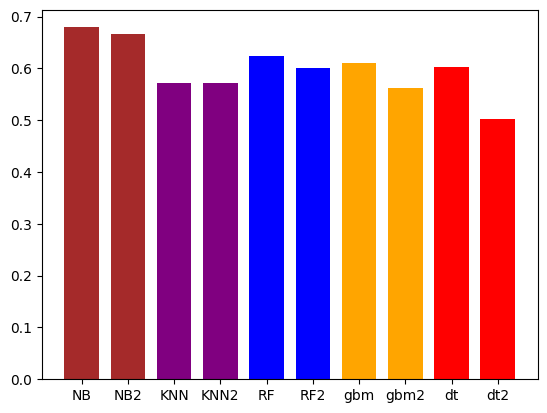

In [88]:
results=[
    NB_cv_scores.mean(),
    NB2_cv_scores.mean(),
    KNN_cv_scores.mean(),
    KNN2_cv_scores.mean(),
    RF_cv_scores.mean(),
    RF2_cv_scores.mean(),
    gbm_cv_scores.mean(),
    gbm2_cv_scores.mean(),
    dt_cv_scores.mean(),
    dt2_cv_scores.mean()
]
axis=[
    'NB',
    'NB2',
    'KNN',
    'KNN2',
    'RF',
    'RF2',
    'gbm',
    'gbm2',
    'dt',
    'dt2'
]
plt.bar(axis, results, width = 0.75, color = ['brown', 'brown', 'purple', 'purple', 'blue', 'blue', 'orange', 'orange','red', 'red'])


# T-Test

In [92]:
t_statistic, p_value = stats.f_oneway(
NB_cv_scores, KNN_cv_scores, RF_cv_scores, gbm_cv_scores, dt_cv_scores
)

new_t_statistic, new_p_value = stats.f_oneway(
NB2_cv_scores, KNN2_cv_scores, RF2_cv_scores, gbm2_cv_scores, dt2_cv_scores
)

print("T-Statistic:", t_statistic)
print("new_T-Statistic:", new_t_statistic)
print("P-Value:", p_value)
print("new_P-Value:", new_p_value)

T-Statistic: 1.4450658510196943
new_T-Statistic: 2.5857820153370885
P-Value: 0.2348202791918063
new_P-Value: 0.04951910673756055


<BarContainer object of 4 artists>

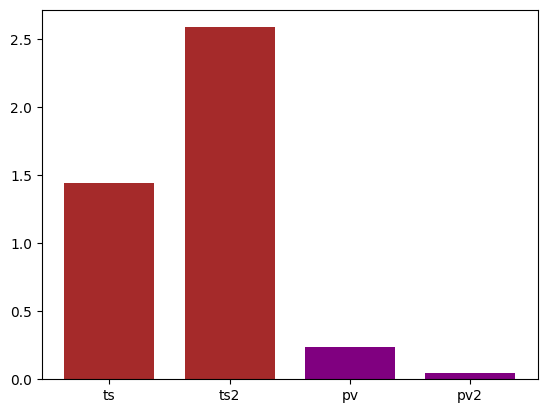

In [93]:
results=[
      t_statistic,
      new_t_statistic,
      p_value,
      new_p_value
]

axis=[
    'ts',
    'ts2',
    'pv',
    'pv2'
]

plt.bar(axis, results, width = 0.75, color = ['brown', 'brown', 'purple', 'purple'])